# Seaborn - eleganckie wykresy w Python
# [AnalitykEduPL](http://analityk.edu.pl/seaborn-eleganckie-wykresy-w-python/)

Biblioteką, która jest od zalania dziejów w Python, w celu tworzenia wykresów jest Matplotlib. Biblioteka o dużych możliwościach, jednak aby wygenerować atrakcyjny wizualnie wykres, trzeba się sporo natrudzić. Z odsieczą przychodzi nam biblioteka Seaborn, która staje się co raz częściej, standardem analizy danych. 

## Instalacja oraz import biblioteki Seaborn

Ponieważ Seaborn, zbudowany jest na bazie Matplotliba, potrzeby zaimportować i jego. Będziemy korzystać z klasy plt, za pomocą które będziemy wyświetlać, przygotowane w Seaborn wykresy.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Przygotowanie zbioru danych

Na potrzeby nauki, skorzystamy z dwóch zbiorów danych

### 1 - Dane na temat generowania CO2 przez poszczególne państwa
Dostępny w serwisie analityk.edu.pl, pod załączonym linkiem

In [ ]:
df = pd.read_excel('http://analityk.edu.pl/wp-content/uploads/2020/01/World_Bank_CO2_cleaned.xlsx')

In [ ]:
df.head()

Usuniemy wiersze z wartościami pustymi, oraz zostawimy dane większe od 1980, z faktu, że wcześniejsze dane mogą nie być rzetelne

In [ ]:
df= df[~df['CO2 (kt)'].isnull() & ~df['CO2 Per Capita (metric tons)'].isnull() & (df['Year'] > 1980)]
df.head()

Dla ułatwienia, przygotujmy jeszcze zbiór, zawierający tylko dane Polski

In [ ]:
df_pl = df[df['Country Name']=='Poland']

### 2 - dane na temat napiwków.
zbiór dołączony do biblioteki Seaborn

In [341]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Rodzaje wykresów


### Poniżej, nauczymy się wykorzystywać 4 najpopularniejsze wykresy w Seaborn
1 - wykres relacyjny
2 - Wykresy z kategoriami
3 - wykresy regresji
4 - dystrybucji oraz korelacji

## 1 - Wykres relacyjny

Wykresy relacyjne, możemy tworzyć na kilka sposobów. My wykorzystamy do tego funkcję relplot (). Przekazywane do niej parametry, pozwolą nam, na sterowanie typem wykresu oraz jego wyglądem

Najważniejsze parametry to oczywiście źródło danych - data, dane na oś x - x, dane na oś y - y

Ale również: aspect - szerokość wykresu, kind - typ, hue - kategorie danych, które mają decydować o kolorach

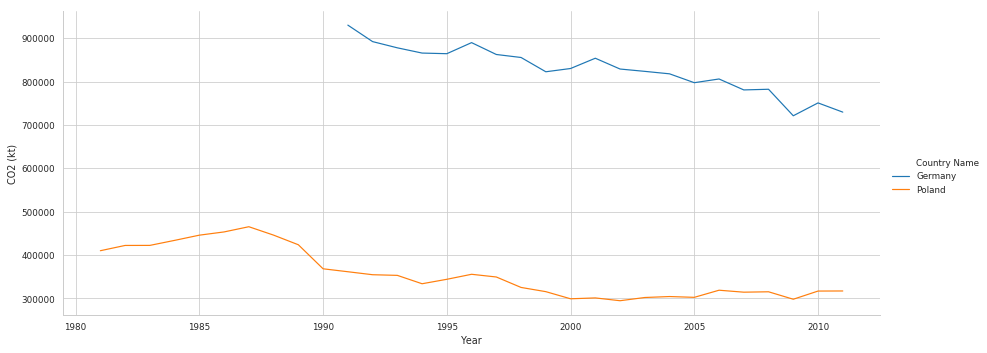

In [334]:
sns.set_context('paper')
sns.relplot(data=df[(df['Country Name'] == 'Poland') | (df['Country Name'] == 'Germany') ],
            x="Year",
            y="CO2 (kt)",
            aspect=2.5, 
            kind='line',
            hue='Country Name')
plt.show()

Wyświetliliśmy ilość generowanego CO2 dla Polski oraz Niemiec, w czasie. Parametrem HUE, zmieniliśmy kolory państw, natomiast parametrem kind - wskazaliśmy wykres liniowy.

Wygenerujny wykres ponownie, tym razem, na osobnych wykresach, oraz zamiast linii, chcemy mieć punkty

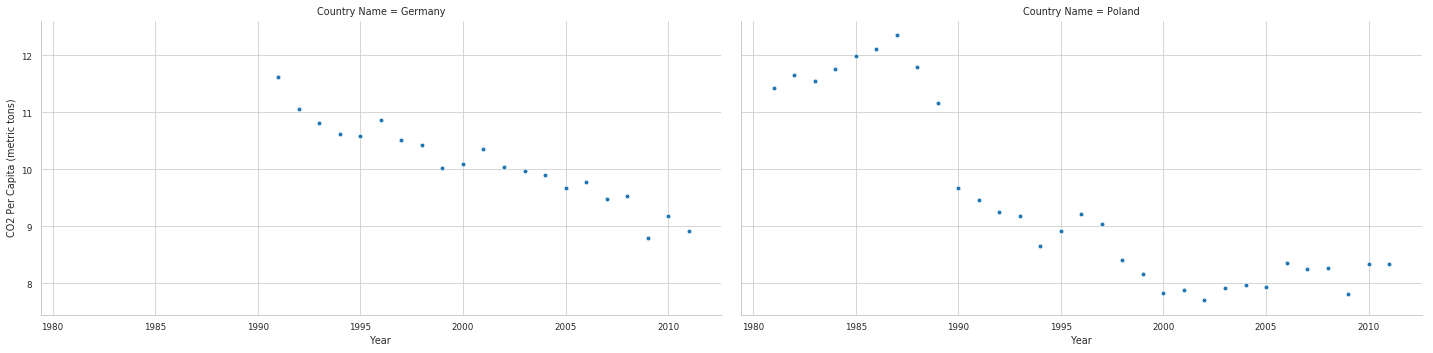

In [336]:
sns.set_context('paper')
sns.relplot(data=df[(df['Country Name'] == 'Poland') | (df['Country Name'] == 'Germany') ],
            x="Year",
            y="CO2 Per Capita (metric tons)",
            aspect=2, 
            kind='scatter',
            col='Country Name')
plt.show()

Tym razem użyliśmy parametr col, który decyduje o rozdzieleniu wykresów, po zmiennej 'Country Name'

Użyjemy teraz, naszego drugiego zbioru danych, z danymi na temat napiwków. Chcemy zobaczyć, czy rozmiar napiwku ma, znaczenie od wielkości rachunku oraz od tego czy osoba była paląca czy nie.

Użyjemy nowego parametru - size, który mówi, iż wielkość punktu na wykresie, powinna być uzależniona od wysokości zmiennej 'size', w zbiorze danych.

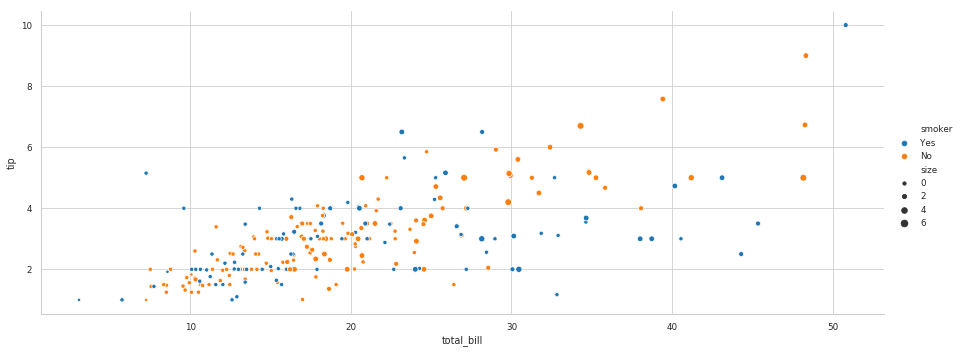

In [339]:

sns.relplot(x="total_bill", 
            y="tip", 
            aspect=2.5, 
            data=tips,
            size='size',
            hue='smoker',
            kind="scatter");
plt.show()

## 2 - Wykresy z kategoriami

Nastepnymi ważnymi wykresami, są wykresy z kategoriami, takie jak bar plot czy box plot. 

Mamy do dyspozycji, funkcję 'catplot', w której za pomocą, znanego nam parametru 'kind', możemy precyzować typ wykresu, który chcemy.

Na początku, zobaczmy wykres domyślny:

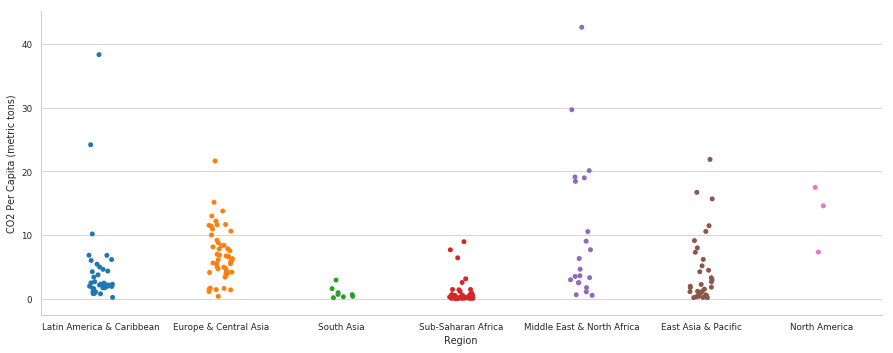

In [340]:
sns.catplot(x="Region", 
            y="CO2 Per Capita (metric tons)", 
            data=df[df['Year']==2010], 
            aspect=2.5)
plt.show()

Teraz wykorzystajmy parametr kind, i zmieńmy typ wykresu:

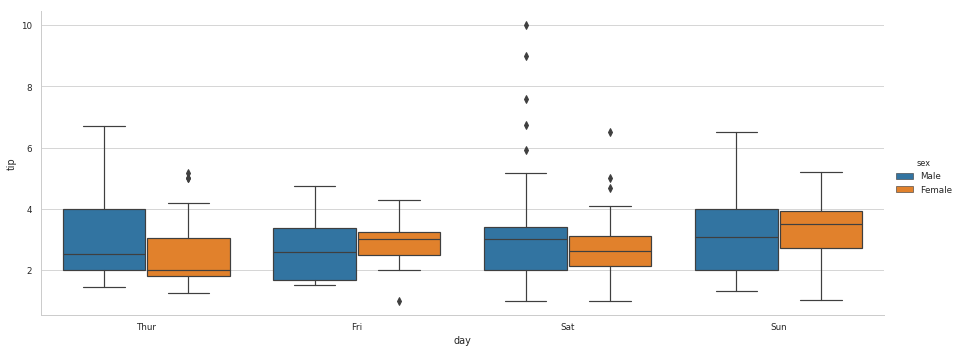

In [342]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", 
            y="tip", 
            aspect=2.5, 
            data=tips,
            kind='box',
            hue='sex')
plt.show()

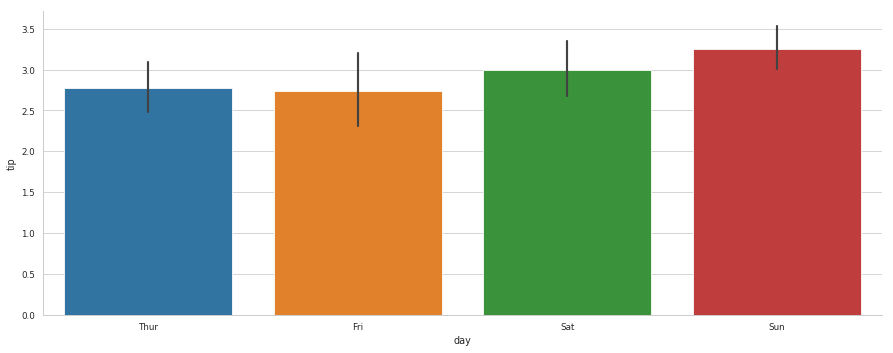

In [344]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", 
            y="tip", 
            aspect=2.5, 
            data=tips,
            kind='bar')
plt.show()

## 3 - Regresja

Kolejnym typem wykresu, z którym się zapoznamy to wykres relacyjny, z regresją. Wykorzystajmy do tego celu, znany nam zbiór danych z CO2, dla Polski, Niemiec, po 1990.

Funkcja, która nam to umożliwi, to lmplot().

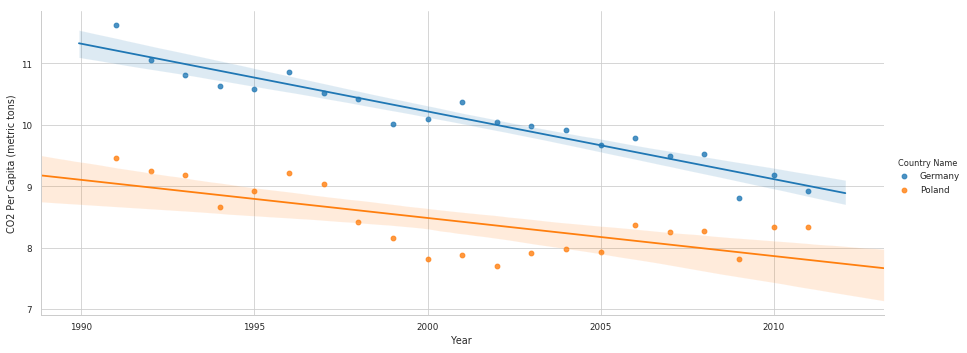

In [345]:
sns.set_context('paper')
sns.lmplot(data=df[((df['Country Name'] == 'Poland') | (df['Country Name'] == 'Germany')) & (df['Year']>1990)],
            x="Year",
            y="CO2 Per Capita (metric tons)",
            aspect=2.5, 
            hue='Country Name')
plt.show()

## 4 - Dystrybucja

Ostatnim typem wykresu, z którym się zapoznamy, to histogram. Wykres z dystrybucją.

Funkcją, którą będziemy wykorzystywać, to distplot().

Podstawowe parametry, które się przydarzą, to bins - liczba przedziałów, oraz dość skomplikowany kde_kws, w którym podajemy legendę.

Aby utworzyć dystrybucję, dla więcej niż jednej, kategorii, należy wywołać funkcję, kilkakrotnie, przed wywołaniem funkcji rysującej plt.show()

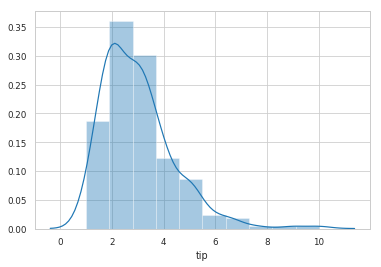

In [349]:
tips = sns.load_dataset("tips")
sns.distplot(tips['tip'], bins=10)
plt.show()

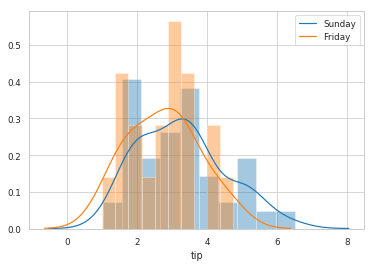

In [350]:
tips = sns.load_dataset("tips")
sns.distplot(tips[tips['day']=='Sun']['tip'], bins=10, kde_kws={"label": "Sunday"})
sns.distplot(tips[tips['day']=='Fri']['tip'], bins=10, kde_kws={"label": "Friday"})
plt.show()

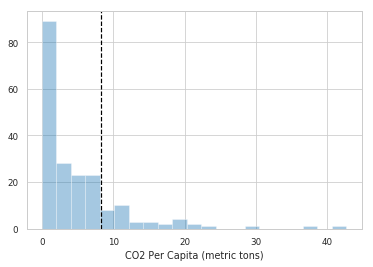

In [351]:

sns.distplot(df[df['Year']==2010]['CO2 Per Capita (metric tons)'],
             kde=False
            );
plt.axvline(8.3, 
            color="k", 
            linestyle="--");
plt.show()


I na zakończenie, jeszcze funkcja pairplot()

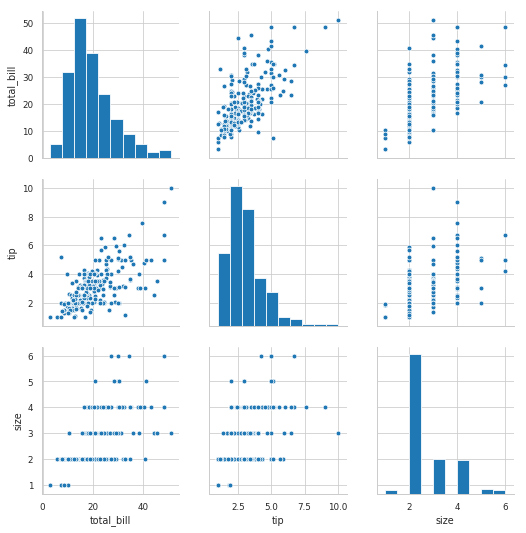

In [348]:
sns.pairplot(tips);
plt.show()

## Kalibracja stylu wykresów Seaborn

Na zakończenie, zobaczymy jeszcze jak możemy w łatwy sposób, zmieniać wygląd wykresu. Użyjemy do tego funkcji set_style() oraz set_context(). Szczegóły pozostawiamy do doczytania na stronie Seaborn.

In [ ]:
sns.relplot(data=df_pl,x="Year",y="CO2 (kt)",aspect=2)
plt.show()

In [ ]:
sns.set_style("whitegrid")

sns.relplot(data=df_pl,x="Year",y="CO2 (kt)",aspect=2)
plt.show()

In [ ]:
sns.set_style("dark")
sns.relplot(data=df_pl,x="Year",y="CO2 (kt)",aspect=2)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.set_context("poster")
sns.relplot(data=df_pl,x="Year",y="CO2 (kt)",aspect=2, kind='scatter')
plt.show()

In [ ]:
sns.set_context("paper")
sns.relplot(data=df_pl,x="Year",y="CO2 (kt)",aspect=2, kind='line')
plt.title("Emission of CO2 - Poland vs Germany vs Italy")
plt.xlabel("Years")
plt.ylabel("CO2")
plt.show()